# Shubhankar Sharma

In [3]:
#use naive bayes, random forest, log reg,svm among others
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [4]:
eeg_data = pd.read_csv("/content/emotions.csv")

In [5]:
len(eeg_data)


2132

In [6]:
eeg_data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [7]:
#Separating Positive,Negative and Neutral dataframes for plotting
pos = eeg_data.loc[eeg_data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = eeg_data.loc[eeg_data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = eeg_data.loc[eeg_data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

In [8]:
sample_pos

,2
fft_0_b,-85.9
fft_1_b,361.0
fft_2_b,-62.2
fft_3_b,-62.2
fft_4_b,361.0
...,...
fft_745_b,-267.0
fft_746_b,281.0
fft_747_b,-148.0
fft_748_b,-148.0


In [9]:
sample_neg

,0
fft_0_b,-508.0
fft_1_b,438.0
fft_2_b,-222.0
fft_3_b,-222.0
fft_4_b,438.0
...,...
fft_745_b,-215.0
fft_746_b,280.0
fft_747_b,-162.0
fft_748_b,-162.0


In [10]:
sample_neu

,1
fft_0_b,126.0
fft_1_b,-4.0
fft_2_b,7.42
fft_3_b,7.42
fft_4_b,-4.0
...,...
fft_745_b,182.0
fft_746_b,2.57
fft_747_b,-31.6
fft_748_b,-31.6


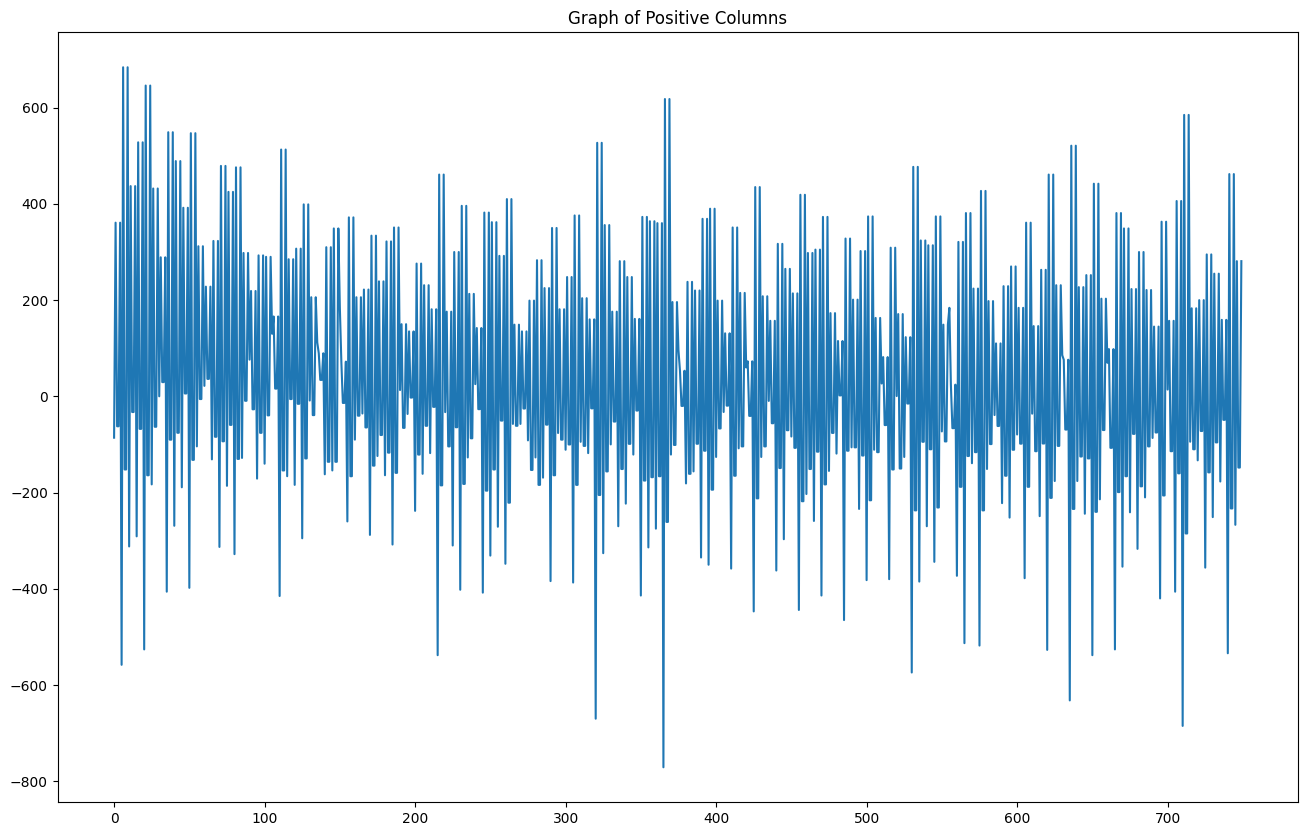

In [11]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()


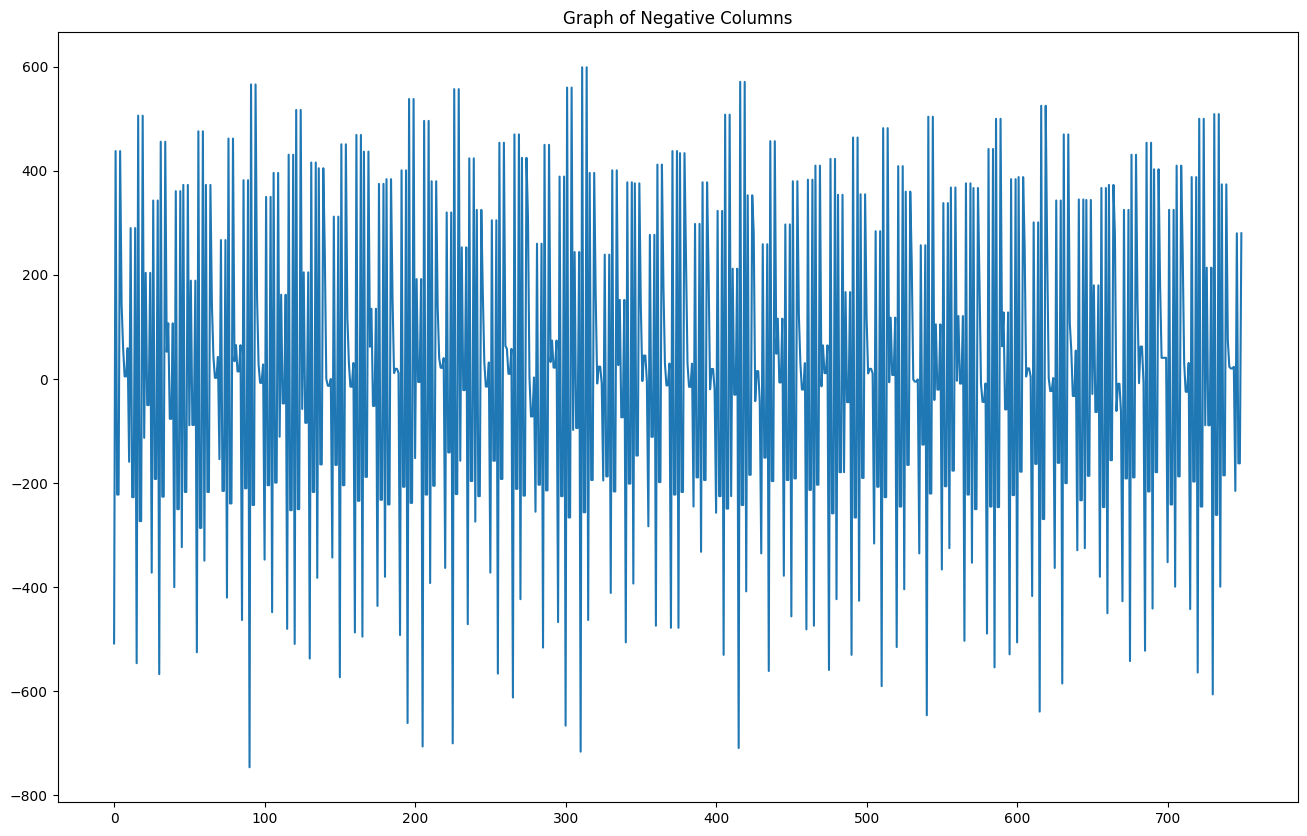

In [12]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

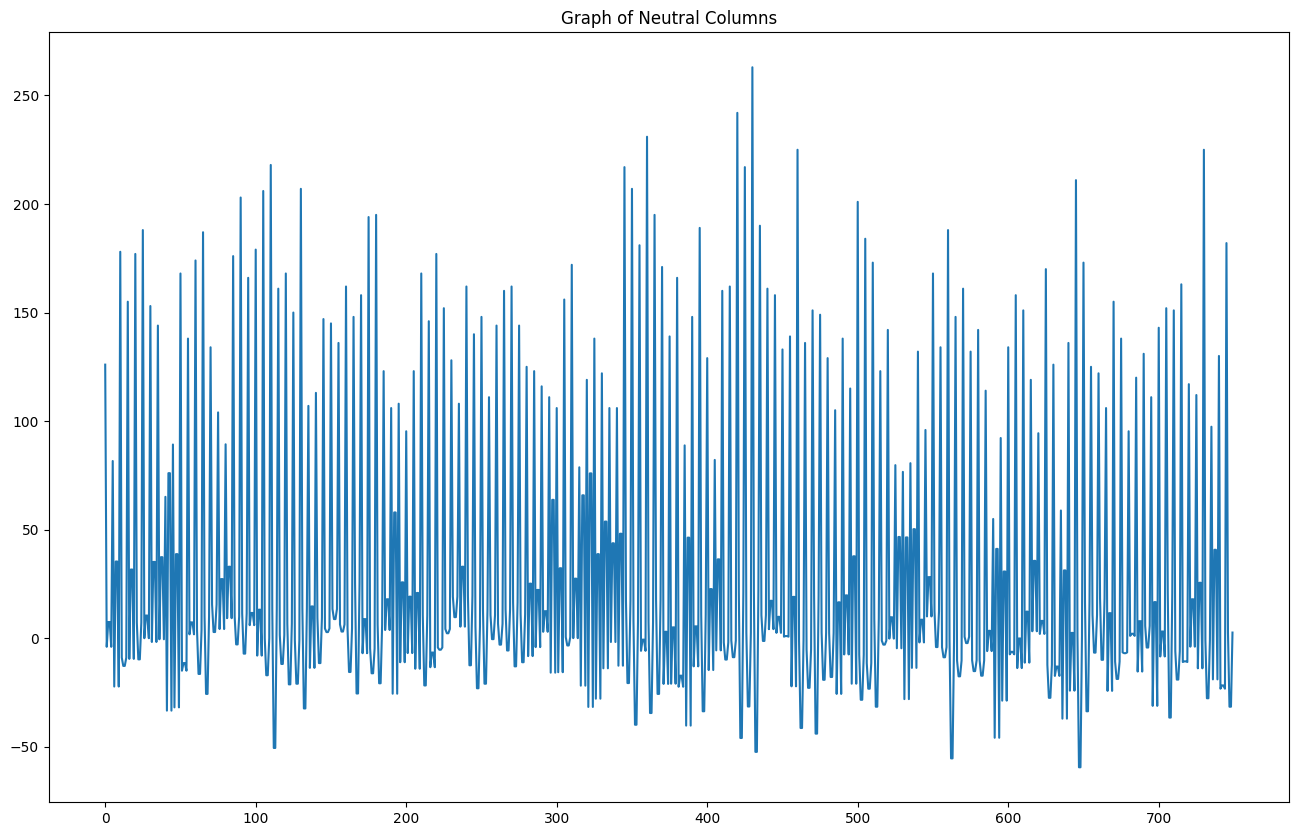

In [13]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [14]:
def Transform_data(data):

    # so here we have kept a dictionary of how the labels willl be mapped to numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1 , 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    return X,y

In [15]:
eeg_data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [16]:
X,Y = Transform_data(eeg_data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [17]:
Y

array([2, 0, 1, ..., 2, 2, 0])

In [18]:
x_train.shape[1]


2548

In [19]:
x_test.shape[1]

2548

In [20]:
y_train.shape

(1492,)

In [21]:
#for this project, I am using a random forest

RFC_model = RandomForestClassifier(random_state=20)
RFC_model.fit(x_train,y_train)

RandomForestClassifier(random_state=20)

In [22]:
y_pred = RFC_model.predict(x_test)
report = classification_report(y_test, y_pred)
print('Classification report for Random Forest', '\n'*2, report, '\n')

Classification report for Random Forest 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       0.99      0.97      0.98       209
           2       0.97      0.99      0.98       216

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640
 



Naive Bias Classifier

In [23]:
x_train.shape


(1492, 2548)

In [24]:
y_train.shape

(1492,)

In [25]:
y_train

array([2, 2, 2, ..., 1, 0, 2])

In [26]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(x_train,y_train)


GaussianNB()

In [27]:
y_pred = GNB_model.predict(x_test)
report = classification_report(y_test, y_pred)
print('Classification report for Gaussian Naive Bayes', '\n'*2, report, '\n')

Classification report for Gaussian Naive Bayes 

               precision    recall  f1-score   support

           0       0.65      0.97      0.78       215
           1       0.45      0.35      0.39       209
           2       0.85      0.61      0.71       216

    accuracy                           0.65       640
   macro avg       0.65      0.64      0.63       640
weighted avg       0.65      0.65      0.63       640
 



Log Reg Classifier

In [28]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = LR_model.predict(x_test)
report = classification_report(y_test, y_pred)
print('Classification report for Logistic Regression', '\n'*2, report, '\n')

Classification report for Logistic Regression 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       215
           1       0.96      0.93      0.95       209
           2       0.94      0.97      0.95       216

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640
 



Light Gradient Booster Classifier

In [30]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.281309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 644274
[LightGBM] [Info] Number of data points in the train set: 1492, number of used features: 2546
[LightGBM] [Info] Start training from score -1.091267
[LightGBM] [Info] Start training from score -1.095267
[LightGBM] [Info] Start training from score -1.109394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

LGBMClassifier()

In [31]:
y_pred = lgb_model.predict(x_test)
report = classification_report(y_test, y_pred)
print('Classification report for Light Gradient Boosting Model', '\n'*2, report, '\n')

Classification report for Light Gradient Boosting Model 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       0.99      0.99      0.99       209
           2       0.99      0.99      0.99       216

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640
 



SVM Model

In [32]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [33]:
y_pred = svm_model.predict(x_test)
report = classification_report(y_test, y_pred)
print("Classification Report for Support Vector Machine Model" ,'\n'*2, report, '\n')

Classification Report for Support Vector Machine Model 

               precision    recall  f1-score   support

           0       0.99      0.98      0.98       215
           1       0.94      0.89      0.91       209
           2       0.91      0.97      0.94       216

    accuracy                           0.95       640
   macro avg       0.95      0.94      0.94       640
weighted avg       0.95      0.95      0.95       640
 



As per the 5 models used above:
1. Random forest Classifier
2. Gaussian Naive Bayes
3. Logistic Regression
4. Light Gradient Boosting
5. Support Vector Machine Model


All the models perform quite well on the EEG data, achieving accuracy levels above the 75-80% threshold in predicting emotions. However, since this is for medical purposes, recall is a key metric to assess the reliability of the models.

Among the models, Light Gradient Boosting and Random Forest Classifiers show the highest recall, indicating that decision tree-based approaches are most effective for this dataset. Both models achieve an impressive weighted average recall and accuracy of 0.99, making them strong candidates for classification.